In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
import tensorflow as tf

One-hot Encoding of Classes

In [ ]:
# class data
labels = ["shoe", "dress", "shoe", "t-shirt", "shoe", "t-shirt", "shoe", "dress"]

# one-hot encoding
categories = np.array(["t-shirt", "dress", "shoe"])
n_categories = 3
ohe_labels = np.zeros((len(labels), n_categories))
for i in range(len(labels)):
  j = np.where(categories == labels[i]) # find the location of this label in the categories variable
  ohe_labels[i, j] = 1  # set the corresponding zero to one

In [ ]:
ohe_labels  # prediction

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout, BatchNormalization

# **Convolution**

Images of objects contain edges, and neighboring pixels along an edge tend to have similar patterns. How can we use these correlations to our advantage?

**Convolution in one dimension:** The kernel defines the feature that we are looking for. Look for a change between values. Start the result as all zeros and then slide the kernel along the array. In each location multiply the values in the array with the values in the Kernel and sum them up.  
The edges that go from zero to one match the kernel, so the convolution becomes positive, but the edges from 1 to 0 are the opposite of the kernel. In these locations, the convolution becomes negative.

In [ ]:
array = np.array([0, 0, 1, 1, 0, 0, 1, 1, 0, 0])
kernel = np.array([-1, 1])
conv = np.zeros(9, dtype=int)
for i in range(8):
  conv[i] = (kernel * array[i:i+2]).sum()

In [ ]:
conv

array([ 0,  1,  0, -1,  0,  1,  0, -1,  0])

**Convolution in Images:** Convolutions of images do the same operation, but in two dimensions. In this case, convolve the image with a kernel that matches vertical edges on the left. This means that when we convolve the image with this kernel, the left edge is emphasized. The right side of the image is the opposite of this kernel, and the convolution is negative there.

In [ ]:
kernel = np.array([[-1, 1], [-1, 1]])
conv = np.zeros((27, 27), dtype=int)
#for i in range(27):
  #for j in range(27):
    #window = image[i:i+2, j:j+2]
    #conv[i, j] = np.sum(window * kernel)

In [ ]:
# kernel to find a vertical line in images
verti_kernel = np.array([[-1, 1, -1], [-1, 1, -1], [-1, 1, -1]])

# kernel to find a horizontal line in images
horiz_kernel = np.array([[-1, -1, -1], [1, 1, 1], [-1, -1, -1]])

# kernel to find a light spot surrounded by dark pixels
light_kernel = np.array([[-1, -1, -1], [-1, 1, -1], [-1, -1, -1]])

# kernel to find a dark spot surrounded by bright pixels
dark_kernel = np.array([[1, 1, 1], [1, -1, 1], [1, 1, 1]])

# **Image Classification with Keras**

In [ ]:
train = pd.read_csv('mnist_train.csv')
testX = pd.read_csv('mnist_test.csv')
train.shape, testX.shape, train.columns

((42000, 785),
 (28000, 784),
 Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
        'pixel6', 'pixel7', 'pixel8',
        ...
        'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
        'pixel780', 'pixel781', 'pixel782', 'pixel783'],
       dtype='object', length=785))

There are 42000 images. Note that the 28x28 data matrix for each image has been flattened into a 784-column vector. 

Split the train and test sets

In [ ]:
X = train.loc[:, 'pixel0':'pixel783']
y = train.loc[:, 'label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

Plot the first 10 images in X. Need to reshape each into a 28x28 matrix to display the images.

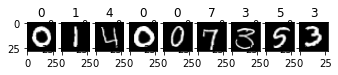

In [ ]:
for i in range(1, 10):
  plt.subplot(1, 10, i)
  plt.imshow(X.iloc[i].values.reshape((28,28)), cmap='gray')
  plt.title(y.iloc[i])

Encode the labels

In [ ]:
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [ ]:
tf.random.set_seed(123)
std_model = Sequential()
std_model.add(Dense(32, activation='relu', input_dim=784))  # input_shape=(784, )
std_model.add(Dense(16, activation='relu'))
std_model.add(Dense(10, activation='softmax'))
std_model.compile(optimizer='Adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
std_model.fit(X_train.values, y_train.values, epochs=10, batch_size=128, validation_data=(X_test.values, y_test.values))

Epoch 1/10
263/263 [==============================] - 2s 5ms/step - loss: 18.4045 - accuracy: 0.3321 - val_loss: 1.4816 - val_accuracy: 0.5990
Epoch 2/10
263/263 [==============================] - 1s 3ms/step - loss: 1.3574 - accuracy: 0.6260 - val_loss: 1.1121 - val_accuracy: 0.7043
Epoch 3/10
263/263 [==============================] - 1s 3ms/step - loss: 0.9652 - accuracy: 0.7332 - val_loss: 0.8188 - val_accuracy: 0.8102
Epoch 4/10
263/263 [==============================] - 1s 3ms/step - loss: 0.7219 - accuracy: 0.8170 - val_loss: 0.6921 - val_accuracy: 0.8394
Epoch 5/10
263/263 [==============================] - 1s 3ms/step - loss: 0.6234 - accuracy: 0.8317 - val_loss: 0.5999 - val_accuracy: 0.8556
Epoch 6/10
263/263 [==============================] - 1s 3ms/step - loss: 0.5259 - accuracy: 0.8601 - val_loss: 0.5555 - val_accuracy: 0.8657
Epoch 7/10
263/263 [==============================] - 1s 3ms/step - loss: 0.4550 - accuracy: 0.8745 - val_loss: 0.5367 - val_accuracy: 0.8707
Epoch

No need to evaluate the model. While fitting, validated the model.

Predict the model for the test set.

In [ ]:
y_pred = std_model.predict(testX.values, verbose=0)
y_pred[:3]

array([[6.3260389e-13, 3.3715683e-11, 1.0000000e+00, 1.4974412e-10,
        3.3544623e-33, 9.1560032e-21, 2.7864573e-26, 2.9182335e-26,
        1.2767387e-37, 2.5311792e-13],
       [1.0000000e+00, 1.7274614e-32, 1.1153887e-31, 1.5191658e-19,
        3.4879602e-23, 1.5040452e-21, 7.8255655e-15, 1.7698656e-23,
        1.3055715e-13, 4.0211734e-25],
       [7.7489037e-03, 5.0734100e-04, 1.4783049e-02, 5.3908300e-02,
        1.1161790e-01, 1.3231944e-02, 1.2816133e-03, 5.8331244e-02,
        5.5488113e-02, 6.8310153e-01]], dtype=float32)

Obtain the classes

In [ ]:
y_predicted = [x.round() for x in y_pred]
y_predicted[:3]

[array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)]

Extract the positions of 1

In [ ]:
np.argmax(std_model.predict(testX.values), axis=-1)

array([2, 0, 9, ..., 3, 9, 2])

# **CNN for Image Classification with Keras**

Reshape the datasets: Unflatten the flattened datasets to use CNN  
In reshaping an array, -1 means that it is an unknown dimension and we want numpy to figure it out. And numpy will find this by looking at the length of the array and remaining dimensions. 

In [ ]:
X_im = X.values.reshape(-1, 28, 28, 1)  # 28*28 = 784, so the number of rows in X remains the same
testX_im = testX.values.reshape(-1, 28, 28, 1)
y_cat = pd.get_dummies(y) # one-hot encoding for the labels
X_im.shape, testX_im.shape, y_cat.shape

((42000, 28, 28, 1), (28000, 28, 28, 1), (42000, 10))

**Convolution layer:** A dense layer has one weight for each pixel in the image, but a convolution layer has only one weight for each pixel in the kernel. For example, if we set kernel_size = 3, the kernel of each unit has 9 pixels. If the layer has 10 units, it would have 90 parameters for these kernels. The input shape is the size of each of the input images to the network.

**Flatten layer:** This serves as a connector between convolution and densely connected layers. This takes the output of the convolution, that we previously referred to as a "feature map", and flattens it into a one-dimensional array. This is the expected input into the densely connected layer that is then added to the network as an output layer.

**padding='valid or same':** The default is "valid", no zero padding added. "same" means that zero padding will be applied to the input to this layer, so that the output of the convolution has the same size as the input into the convolution.

**strides=1 or number:** The default is 1. This means that the kernel slides along the image and is multiplied and summed with each pixel location. The kernel jumps in steps of that number of pixels. This also means that the output will be smaller.

**dilation_rate=2:** set the distance between subsequent pixels.

Calculating the size of the output: O=((I−K+2P)/S)+1, where I=size of the input, K=size of the kernel, P=size of the zero padding, S=strides

**Max pooling:** Summarize the output of convolutional layers in concise manner by summarizing a group of pixels based on its maximal value. After each convolutional layer, add a pooling layer. The input (#) to the MaxPool2D object is the size of the pooling window. That means that pooling will take the max over a window of # by # pixels from the input for each location in the output.

**Dropout:** In each step of learning, choose a random subset of the units in a layer and ignore it. This group of units would be ignored both on the forward pass through the network, as well as in the back-propagation stage.

**Disharmony:** While dropout slows down learning, making it more incremental and careful, batch normalization tends to make learning go faster. Their effects together may in fact counter each other, and networks sometimes perform worse when both of these methods are used together than they would if neither were used. This has been called "the disharmony of batch normalization and dropout".

In [ ]:
tf.random.set_seed(123)
cnn_model = Sequential()
# first convolutional layer: may add padding, strides, or dilation_rate
cnn_model.add(Conv2D(10, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
#cnn_model.add(Dropout(0.25))
# first max pooling layer
#cnn_model.add(MaxPool2D(2))
cnn_model.add(BatchNormalization())
# second convolutional layer
cnn_model.add(Conv2D(5, kernel_size=3, activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Flatten())
cnn_model.add(Dense(10, activation='softmax'))

No need to split the train and test sets with 'validation_split'

In [ ]:
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_im, y_cat, validation_split=0.2, epochs=10, batch_size=128)

Epoch 1/10
263/263 [==============================] - 30s 111ms/step - loss: 0.6028 - accuracy: 0.8134 - val_loss: 0.1440 - val_accuracy: 0.9544
Epoch 2/10
263/263 [==============================] - 29s 110ms/step - loss: 0.0954 - accuracy: 0.9715 - val_loss: 0.0981 - val_accuracy: 0.9683
Epoch 3/10
263/263 [==============================] - 29s 110ms/step - loss: 0.0567 - accuracy: 0.9822 - val_loss: 0.0880 - val_accuracy: 0.9732
Epoch 4/10
263/263 [==============================] - 29s 109ms/step - loss: 0.0371 - accuracy: 0.9890 - val_loss: 0.0715 - val_accuracy: 0.9788
Epoch 5/10
263/263 [==============================] - 29s 110ms/step - loss: 0.0250 - accuracy: 0.9924 - val_loss: 0.0765 - val_accuracy: 0.9768
Epoch 6/10
263/263 [==============================] - 29s 110ms/step - loss: 0.0178 - accuracy: 0.9958 - val_loss: 0.0823 - val_accuracy: 0.9746
Epoch 7/10
263/263 [==============================] - 29s 111ms/step - loss: 0.0143 - accuracy: 0.9962 - val_loss: 0.0745 - val_ac

No need to evaluate the model for test sets. While fitting, validated the model.

Predict the model for the test set

In [ ]:
cnn_model.predict(testX_im)

array([[8.5528752e-14, 1.5960161e-22, 1.0000000e+00, ..., 5.6579165e-14,
        9.4896549e-15, 2.2265437e-13],
       [9.9999857e-01, 1.5625001e-16, 7.0768902e-09, ..., 1.6608170e-11,
        3.1182025e-12, 3.2546382e-11],
       [3.8503983e-15, 9.2347185e-16, 5.5891745e-09, ..., 3.0546985e-09,
        6.0170150e-06, 9.9999380e-01],
       ...,
       [1.1808461e-19, 3.3462331e-17, 4.1850621e-13, ..., 4.2036383e-13,
        1.1836504e-09, 3.8992687e-10],
       [2.3176332e-10, 1.9758931e-16, 9.1133977e-15, ..., 8.3992688e-09,
        4.7651926e-07, 9.9980754e-01],
       [6.2199789e-15, 2.5253092e-18, 1.0000000e+00, ..., 2.4110579e-12,
        2.3333122e-10, 8.6718908e-09]], dtype=float32)

Store the optimal parameters: Want to find the best parameters before the network starts over-fitting using one of the callbacks, ModelCheckpoint. This stores the weights of a network at the end of each epoch of learning. The callback monitors the validation loss, and will only overwrite the weights whenever the validation loss shows improvement. That is, the validation loss decreases. This means that if the network overfits, the weights will be stored for the epoch at which the validation loss was the smallest, before it started rising back up.

In [ ]:
from keras.callbacks import ModelCheckpoint
# This checkpoint object will store the model parameters in the file "weights.hdf5"
checkpoint = ModelCheckpoint('weights.hdf5', monitor='val_loss', save_best_only=True)
# Store in a list to be used during training
callbacks_list = [checkpoint]
# Fit the model on a training set, using the checkpoint as a callback
cnn_model.fit(X_im, y_cat, validation_split=0.2, epochs=10, batch_size=128, callbacks=callbacks_list)

Epoch 1/10
263/263 [==============================] - 29s 112ms/step - loss: 0.0027 - accuracy: 0.9999 - val_loss: 0.0777 - val_accuracy: 0.9794
Epoch 2/10
263/263 [==============================] - 29s 111ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0774 - val_accuracy: 0.9798
Epoch 3/10
263/263 [==============================] - 29s 111ms/step - loss: 0.0015 - accuracy: 0.9999 - val_loss: 0.0756 - val_accuracy: 0.9805
Epoch 4/10
263/263 [==============================] - 29s 111ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0799 - val_accuracy: 0.9806
Epoch 5/10
263/263 [==============================] - 29s 111ms/step - loss: 8.4821e-04 - accuracy: 1.0000 - val_loss: 0.0779 - val_accuracy: 0.9807
Epoch 6/10
263/263 [==============================] - 29s 111ms/step - loss: 5.7392e-04 - accuracy: 1.0000 - val_loss: 0.0823 - val_accuracy: 0.9811
Epoch 7/10
263/263 [==============================] - 29s 112ms/step - loss: 6.0859e-04 - accuracy: 1.0000 - val_loss: 0.0

Predict the model with optimal weights for the test set

In [ ]:
# Load the weights from file
cnn_model.load_weights('weights.hdf5')
y_pred = cnn_model.predict(testX_im)

In [ ]:
y_predicted = [x.round() for x in y_pred]
y_predicted[:3]

[array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)]

In [ ]:
position = np.argmax(cnn_model.predict(testX_im), axis=-1)
position[:10]

array([2, 0, 9, 9, 3, 7, 0, 3, 0, 3])

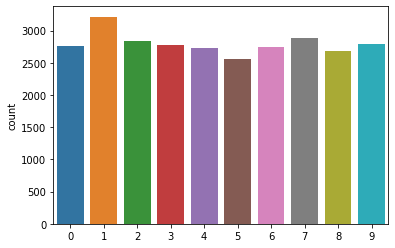

In [ ]:
sns.countplot(x=position)
plt.show()